In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('Clean_data_set.csv')
df.head()

,Unnamed: 0,Bank_Name,Bank_Type,Location,Bank_Caption,User_Name,Bank_Rating,Rating_Comment,User_Comment
0,0,HDFC Bank,Personal Loan,salem,"""Need a quick response """,PANDIYAN,4.0,Great,I was applied HD...
1,1,SBI,Personal Loan,proddatur,"""Best service""",KUMAR,5.0,Blown,I have taken a p...
2,2,HDFC Bank,Personal Loan,proddatur,"""Average service""",PAVAN,4.0,Great,I was applied HD...
3,3,Axis Bank,Personal Loan,pudukkottai,"""Need to improve customer services""",DEVASAHAYAM,1.0,Bad,I have take a pe...
4,4,HDFC Bank,Personal Loan,pudukkottai,"""Good service""",SELVIN,5.0,Blown,I have taken a t...


In [3]:
df.shape

(9790, 9)

In [4]:
df.columns

Index(['Unnamed: 0', 'Bank_Name', 'Bank_Type', 'Location', 'Bank_Caption',
       'User_Name', 'Bank_Rating', 'Rating_Comment', 'User_Comment'],
      dtype='object')

In [5]:
df

,Unnamed: 0,Bank_Name,Bank_Type,Location,Bank_Caption,User_Name,Bank_Rating,Rating_Comment,User_Comment
0,0,HDFC Bank,Personal Loan,salem,"""Need a quick response """,PANDIYAN,4.0,Great,I was applied HD...
1,1,SBI,Personal Loan,proddatur,"""Best service""",KUMAR,5.0,Blown,I have taken a p...
2,2,HDFC Bank,Personal Loan,proddatur,"""Average service""",PAVAN,4.0,Great,I was applied HD...
3,3,Axis Bank,Personal Loan,pudukkottai,"""Need to improve customer services""",DEVASAHAYAM,1.0,Bad,I have take a pe...
4,4,HDFC Bank,Personal Loan,pudukkottai,"""Good service""",SELVIN,5.0,Blown,I have taken a t...
...,...,...,...,...,...,...,...,...,...
9785,11973,HSBC Bank,Credit Card,bangalore,"""Good Card""",PARUL,4.0,Great,There are good o...
9786,11974,review,Other Loan,bangalore,"""Good App""",ANONYMS,4.0,Great,Paytm is a good ...
9787,11976,ICICI Bank,Saving Account,bangalore,"""Good Account""",ANONYMS,4.0,Great,From 2014 onward...
9788,11977,review,Other Loan,bangalore,"""Good Account""",ANONYMS,4.0,Great,I am using the A...


In [6]:
df = df.drop('Unnamed: 0', axis=1)


In [7]:
analyze = SentimentIntensityAnalyzer()

# get the sentiment scores for each review given

def sentiment_score(review):
    score = analyze.polarity_scores(review)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment'] = df['User_Comment'].apply(sentiment_score)

In [8]:
df.head()

,Bank_Name,Bank_Type,Location,Bank_Caption,User_Name,Bank_Rating,Rating_Comment,User_Comment,sentiment
0,HDFC Bank,Personal Loan,salem,"""Need a quick response """,PANDIYAN,4.0,Great,I was applied HD...,negative
1,SBI,Personal Loan,proddatur,"""Best service""",KUMAR,5.0,Blown,I have taken a p...,positive
2,HDFC Bank,Personal Loan,proddatur,"""Average service""",PAVAN,4.0,Great,I was applied HD...,negative
3,Axis Bank,Personal Loan,pudukkottai,"""Need to improve customer services""",DEVASAHAYAM,1.0,Bad,I have take a pe...,negative
4,HDFC Bank,Personal Loan,pudukkottai,"""Good service""",SELVIN,5.0,Blown,I have taken a t...,positive


In [9]:
# overall sentiment distribution

sentiment_distr = df['sentiment'].value_counts(normalize=True)
sentiment_distr

sentiment
positive    0.864862
negative    0.097549
neutral     0.037589
Name: proportion, dtype: float64

Observation: 

The distribution of sentiment in this dataset varies, it can be seen that there are 86.4% positive sentiment recorded

In [15]:
# sentiment distribution for each bank in the dataset

bank_sentiment = df.groupby('Bank_Name')['sentiment'].value_counts(normalize=True)
bank_sentiment

Bank_Name             sentiment
Aditya Birla Finance  2            1.000000
Aegon Life            2            1.000000
American Express      2            0.945946
                      1            0.054054
Aviva                 2            1.000000
                                     ...   
andhra Bank           2            0.500000
                      0            0.500000
review                2            0.792465
                      0            0.136654
                      1            0.070881
Name: proportion, Length: 166, dtype: float64

# Ranking of Banks by Sentiment Score

The table below is a ranking of the banks based on their sentiment score:

| Bank_Name | positive | negative | neutral |
|-----------|----------|----------|---------|
| Aditya Birla Finance | 1.0 | 0 | 0 |
| Aegon Life | 1.0 | 0 | 0 |
| American Express | 0.9459459459459459 | 0 | 0.05405405405405406 |
| Aviva | 1.0 | 0 | 0 |
| Axis Bank | 0.8925 | 0.0975 | 0.01 |
| Bajaj Allianz | 0.75 | 0.20833333333333334 | 0.041666666666666664 |
| Bajaj Allianz Life | 0.7777777777777778 | 0.2222222222222222 | 0 |
| Bajaj Finserv | 0.825 | 0.075 | 0.1 |
| Bank of Baroda | 0.8 | 0.2 | 0 |
| Bank of Maharashtra | 1.0 | 0 | 0 |
| Bharti Axa | 1.0 | 0 | 0 |
| Birla Sun | 1.0 | 0 | 0 |
| Canara Bank | 0.8214285714285714 | 0.08928571428571429 | 0.08928571428571429 |
| Canara HSBC Oriental Bank of Commerce | 0 | 1.0 | 0 |
| Capital First | 0.9 | 0.1 | 0 |
| Cashe | 1.0 | 0 | 0 |
| Chola Ms | 1.0 | 0 | 0 |
| Cholamandalam Finance | 1.0 | 0 | 0 |
| Citibank | 0.9206842923794712 | 0.05443234836702955 | 0.024883359253499222 |
| Corporation Bank | 1.0 | 0 | 0 |
| DBS Bank | 1.0 | 0 | 0 |
| EDELWIESS | 0.7083333333333334 | 0.25 | 0.041666666666666664 |
| Early Salary | 1.0 | 0 | 0 |
| Edelweiss Tokio | 1.0 | 0 | 0 |
| Exide | 1.0 | 0 | 0 |
| Federal Bank | 1.0 | 0 | 0 |
| Fullerton | 0.7865168539325843 | 0.15355805243445692 | 0.0599250936329588 |
| Future Generali | 1.0 | 0 | 0 |
| HDB Financial Services | 1.0 | 0 | 0 |
| HDFC Bank | 0.848816029143898 | 0.11156648451730419 | 0.03961748633879782 |
| HDFC Ergo | 0.7 | 0.25 | 0.05 |
| HDFC Life | 0.8571428571428571 | 0 | 0.14285714285714285 |
| HDFC Limited | 1.0 | 0 | 0 |
| HSBC Bank | 0.8947368421052632 | 0.09774436090225563 | 0.007518796992481203 |
| Hero fincorp | 1.0 | 0 | 0 |
| ICICI | 1.0 | 0 | 0 |
| ICICI Bank | 0.9558541266794626 | 0.0345489443378119 | 0.009596928982725527 |
| ICICI Lombard | 0.7058823529411765 | 0.23529411764705882 | 0.058823529411764705 |
| ICICI Prudential | 0.8461538461538461 | 0.15384615384615385 | 0 |
| IDBI | 0.8461538461538461 | 0.15384615384615385 | 0 |
| IDFC Bank | 1.0 | 0 | 0 |
| IOB | 1.0 | 0 | 0 |
| Iffco Tokio | 0.7058823529411765 | 0.29411764705882354 | 0 |
| Incred | 0.835820895522388 | 0.12686567164179105 | 0.03731343283582089 |
| Indian Bank | 1.0 | 0 | 0 |
| IndusInd Bank | 0.9307745030843043 | 0.06031528444139822 | 0.008910212474297465 |
| Karnataka Bank | 1.0 | 0 | 0 |
| Kotak | 0.8794788273615635 | 0.09120521172638436 | 0.029315960912052116 |
| Kotak Life | 1.0 | 0 | 0 |
| L and T | 1.0 | 0 | 0 |
| L&T Finance | 0.6666666666666666 | 0.16666666666666666 | 0.16666666666666666 |
| LIC | 0.6981132075471698 | 0.1320754716981132 | 0.16981132075471697 |
| Max | 0.8125 | 0.125 | 0.0625 |
| National Insurance | 0.8333333333333334 | 0.05555555555555555 | 0.1111111111111111 |
| New India | 0.8571428571428571 | 0.047619047619047616 | 0.09523809523809523 |
| Oriental Bank of Commerce | 1.0 | 0 | 0 |
| Oriental Insurance | 0.9375 | 0.0625 | 0 |
| PNB Metlife | 1.0 | 0 | 0 |
| PaySense | 0.8214285714285714 | 0.17857142857142858 | 0 |
| Punjab National Bank | 0.8181818181818182 | 0.15151515151515152 | 0.030303030303030304 |
| RBL Bank | 0.9428571428571428 | 0.04 | 0.017142857142857144 |
| Reliance Commercial Finance | 1.0 | 0 | 0 |
| Reliance General | 0.7333333333333333 | 0.2 | 0.06666666666666667 |
| Reliance Life | 0.5 | 0.3333333333333333 | 0.16666666666666666 |
| Royal Sundaram | 0.5 | 0.25 | 0.25 |
| SBI | 0.8104395604395604 | 0.14835164835164835 | 0.04120879120879121 |
| SBI Cards | 0.9161554192229039 | 0.06339468302658487 | 0.02044989775051125 |
| SBI General | 1.0 | 0 | 0 |
| SBI Life | 0.8181818181818182 | 0.09090909090909091 | 0.09090909090909091 |
| Shriram | 0.8571428571428571 | 0.14285714285714285 | 0 |
| Shriram City | 1.0 | 0 | 0 |
| Shriram Life | 0.3333333333333333 | 0.3333333333333333 | 0.3333333333333333 |
| Shubh Loans | 0.9333333333333333 | 0 | 0.06666666666666667 |
| South Indian Bank | 1.0 | 0 | 0 |
| Standard Chartered Bank | 0.8918918918918919 | 0.08108108108108109 | 0.02702702702702703 |
| Sundaram Finance | 1.0 | 0 | 0 |
| Tata AIA | 1.0 | 0 | 0 |
| Tata capital | 0.6862745098039216 | 0.2549019607843137 | 0.058823529411764705 |
| Toyota Finance | 1.0 | 0 | 0 |
| UCO | 1.0 | 0 | 0 |
| Ujjivan Bank | 1.0 | 0 | 0 |
| Union Bank of India | 1.0 | 0 | 0 |
| United India | 0.9545454545454546 | 0.045454545454545456 | 0 |
| YES Bank | 0.9655172413793104 | 0.019704433497536946 | 0.014778325123152709 |
| andhra Bank | 0.5 | 0.5 | 0 |
| review | 0.7924648786717752 | 0.13665389527458494 | 0.07088122605363985 |

This table presents the sentiment distribution for each bank, ranked by their positive sentiment scores. 

The data includes positive, negative, and neutral sentiment proportions for each bank.

# Are higher ratings associated with more positive sentiment words?

In [13]:
def get_sentiment_score(review):
    score = analyze.polarity_scores(review)
    return score['compound']

df['sentiment_score'] = df['User_Comment'].apply(get_sentiment_score)

Average Sentiment Score for each Rating:
Bank_Rating
1.0    0.192183
1.5    0.319144
3.0    0.446087
3.5    0.492139
4.0    0.590940
5.0    0.635300
Name: sentiment_score, dtype: float64


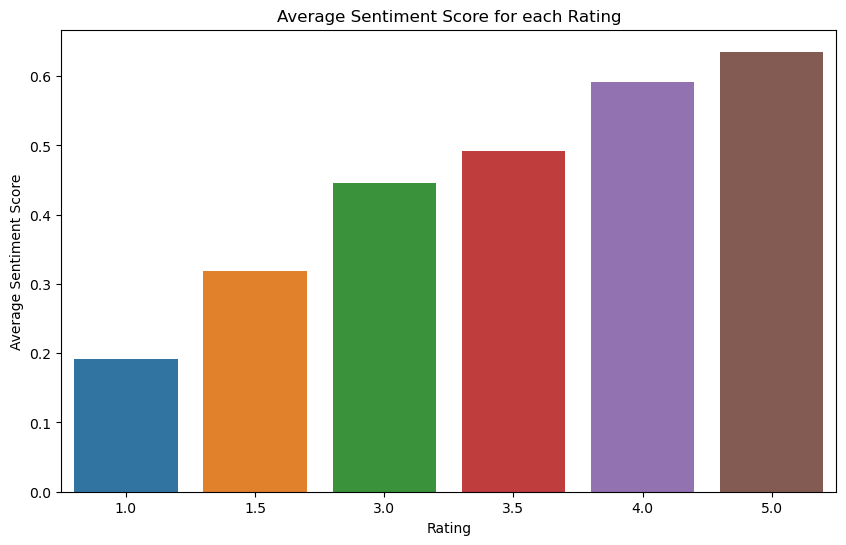

In [14]:
import seaborn as sns
rating_sentiment_avg = df.groupby('Bank_Rating')['sentiment_score'].mean()
print("Average Sentiment Score for each Rating:")
print(rating_sentiment_avg)

# Plot the average sentiment score for each rating
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_sentiment_avg.index, y=rating_sentiment_avg.values)
plt.title('Average Sentiment Score for each Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.show()


# The most common words or phrases used in the reviews

In [16]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words =set(stopwords.words('english'))

def text_process(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens


df['tokens'] = df['User_Comment'].apply(text_process)

In [17]:
df.head()

,Bank_Name,Bank_Type,Location,Bank_Caption,User_Name,Bank_Rating,Rating_Comment,User_Comment,sentiment,sentiment_score,tokens
0,HDFC Bank,Personal Loan,salem,"""Need a quick response """,PANDIYAN,4.0,Great,I was applied HD...,negative,-0.1531,"[applied, hdfc, bank, personal, loan, online, ..."
1,SBI,Personal Loan,proddatur,"""Best service""",KUMAR,5.0,Blown,I have taken a p...,positive,0.8503,"[taken, personal, loan, sbi, bank, executive, ..."
2,HDFC Bank,Personal Loan,proddatur,"""Average service""",PAVAN,4.0,Great,I was applied HD...,negative,-0.0772,"[applied, hdfc, bank, personal, loan, online, ..."
3,Axis Bank,Personal Loan,pudukkottai,"""Need to improve customer services""",DEVASAHAYAM,1.0,Bad,I have take a pe...,negative,-0.5574,"[take, personal, loan, axis, bank, months, bac..."
4,HDFC Bank,Personal Loan,pudukkottai,"""Good service""",SELVIN,5.0,Blown,I have taken a t...,positive,0.0772,"[taken, top, personal, loan, hdfc, bank, exist..."


In [18]:
# common words or phrases

all_words = [word for tokens in df['tokens'] for word in tokens]

positive_words = [word for tokens in df[df['sentiment'] == 'positive']['tokens'] for word in tokens]

negative_words = [word for tokens in df[df['sentiment'] == 'negative']['tokens'] for word in tokens]


In [19]:
# Identify and print specific keywords frequently mentioned in positive or negative reviews
from collections import Counter


all_word_freq = Counter(all_words)
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

print("Most Common Words in Reviews:")
print(all_word_freq.most_common(20))

print("Most Common Words in Positive Reviews:")
print(positive_word_freq.most_common(20))

print("Most Common Words in Negative Reviews:")
print(negative_word_freq.most_common(20))

Most Common Words in Reviews:
[('card', 12172), ('bank', 9129), ('credit', 7892), ('loan', 6838), ('good', 4489), ('using', 4091), ('service', 3862), ('limit', 3596), ('account', 3140), ('applied', 3132), ('years', 3129), ('interest', 3105), ('online', 3019), ('time', 2961), ('got', 2878), ('rate', 2665), ('hdfc', 2646), ('personal', 2362), ('process', 2349), ('amount', 2320)]
Most Common Words in Positive Reviews:
[('card', 11458), ('bank', 7919), ('credit', 7618), ('loan', 5647), ('good', 4333), ('using', 3696), ('service', 3498), ('limit', 3417), ('interest', 2871), ('time', 2713), ('applied', 2678), ('online', 2639), ('years', 2604), ('got', 2593), ('account', 2562), ('rate', 2473), ('hdfc', 2248), ('process', 2062), ('personal', 1934), ('customer', 1934)]
Most Common Words in Negative Reviews:
[('bank', 914), ('loan', 835), ('card', 555), ('account', 430), ('years', 335), ('charges', 327), ('applied', 322), ('amount', 310), ('personal', 298), ('service', 291), ('hdfc', 283), ('usi

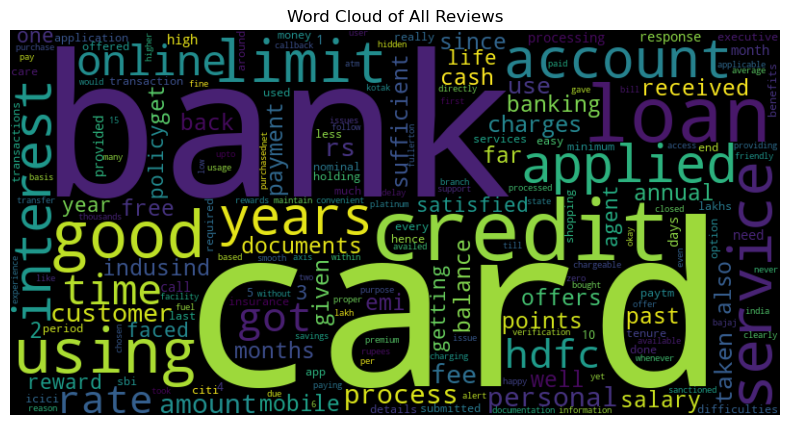

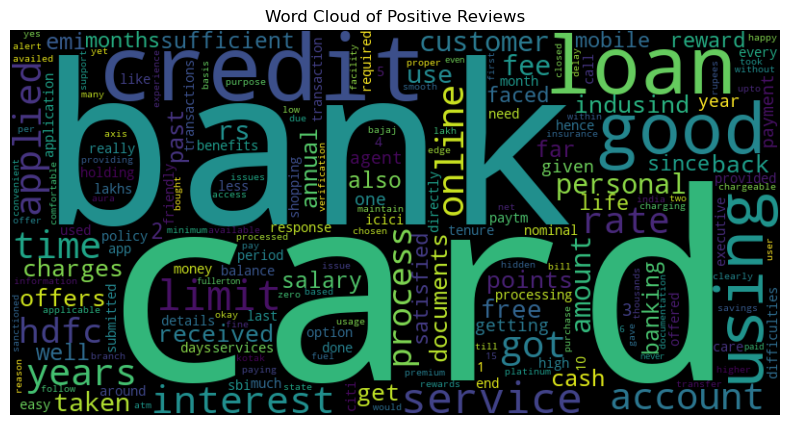

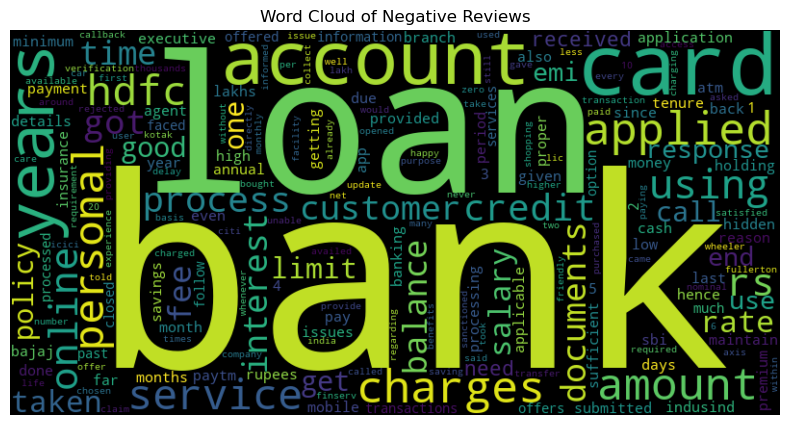

Most Common Words in Reviews:
[('card', 12172), ('bank', 9129), ('credit', 7892), ('loan', 6838), ('good', 4489), ('using', 4091), ('service', 3862), ('limit', 3596), ('account', 3140), ('applied', 3132), ('years', 3129), ('interest', 3105), ('online', 3019), ('time', 2961), ('got', 2878), ('rate', 2665), ('hdfc', 2646), ('personal', 2362), ('process', 2349), ('amount', 2320)]

Most Common Words in Positive Reviews:
[('card', 11458), ('bank', 7919), ('credit', 7618), ('loan', 5647), ('good', 4333), ('using', 3696), ('service', 3498), ('limit', 3417), ('interest', 2871), ('time', 2713), ('applied', 2678), ('online', 2639), ('years', 2604), ('got', 2593), ('account', 2562), ('rate', 2473), ('hdfc', 2248), ('process', 2062), ('personal', 1934), ('customer', 1934)]

Most Common Words in Negative Reviews:
[('bank', 914), ('loan', 835), ('card', 555), ('account', 430), ('years', 335), ('charges', 327), ('applied', 322), ('amount', 310), ('personal', 298), ('service', 291), ('hdfc', 283), ('u

In [20]:
# Function to create and display word cloud
def create_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds
create_wordcloud(all_word_freq, 'Word Cloud of All Reviews')
create_wordcloud(positive_word_freq, 'Word Cloud of Positive Reviews')
create_wordcloud(negative_word_freq, 'Word Cloud of Negative Reviews')


In [29]:
df['Bank_Rating']

0       5.0
1       4.0
2       5.0
3       5.0
4       4.0
       ... 
9785    3.0
9786    5.0
9787    5.0
9788    3.0
9789    5.0
Name: Bank_Rating, Length: 9790, dtype: float64

Does the sentiment of user comments significantly affect the bank rating?

- H0: There is no significant relationship between the sentiment of user comments and the bank rating.
- H1: There is a significant relationship between the sentiment of user comments and the bank rating.

In [40]:
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

In [42]:
from scipy import stats
correlation_coefficient, p_value = stats.pearsonr(df['sentiment_numeric'], df['Bank_Rating'])

In [43]:
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.18732632757360715
P-value: 5.112896642351991e-78


In [44]:
if p_value < 0.05:
    print("Reject H0: There is a significant relationship between the sentiment of user comments and the bank rating.")
else:
    print("Fail to reject H0: There is no significant relationship between the sentiment of user comments and the bank rating.")

Reject H0: There is a significant relationship between the sentiment of user comments and the bank rating.


# The TFIDFVectorizer Model

In [22]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
import pandas as pd  

Fold: 0
Train Accuracy: 1.0
Validation Accuracy: 0.8493360572012257
Classification Report:
              precision    recall  f1-score   support

    negative       0.38      0.38      0.38       191
     neutral       0.43      0.44      0.44        73
    positive       0.92      0.92      0.92      1694

    accuracy                           0.85      1958
   macro avg       0.58      0.58      0.58      1958
weighted avg       0.85      0.85      0.85      1958

---
Fold: 1
Train Accuracy: 1.0
Validation Accuracy: 0.848314606741573
Classification Report:
              precision    recall  f1-score   support

    negative       0.39      0.43      0.41       191
     neutral       0.47      0.42      0.45        73
    positive       0.92      0.91      0.92      1694

    accuracy                           0.85      1958
   macro avg       0.59      0.59      0.59      1958
weighted avg       0.85      0.85      0.85      1958

---
Fold: 2
Train Accuracy: 1.0
Validation Accuracy: 

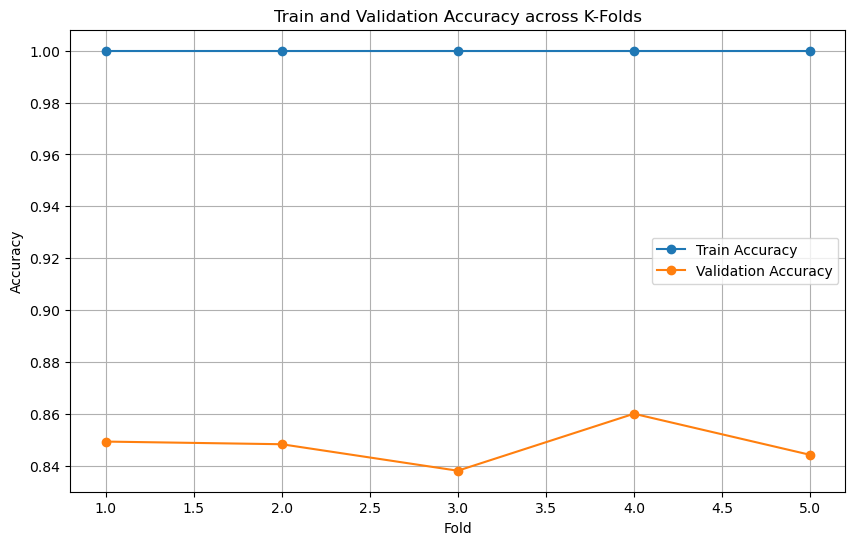

Average Train Accuracy: 1.0000
Average Validation Accuracy: 0.8480


In [23]:

# Prepare data for stratified k-fold cross-validation
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df['sentiment'].values
kf = StratifiedKFold(n_splits=5)


# Assign folds
for f, (train_index, val_index) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_index, 'kfold'] = f

# Initialize lists to store train and validation scores
train_accuracy_list = []
val_accuracy_list = []





for fold in range(5):
    train_df = df[df.kfold != fold].reset_index(drop=True)
    val_df = df[df.kfold == fold].reset_index(drop=True)

    # Vectorization
    tfidf_vec = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_vec.fit(train_df['User_Comment'])
    xtrain = tfidf_vec.transform(train_df['User_Comment'])
    xval = tfidf_vec.transform(val_df['User_Comment'])

    # Decision Tree Model
    model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    model.fit(xtrain, train_df['sentiment'])

    # Train predictions and accuracy
    train_preds = model.predict(xtrain)
    train_accuracy = accuracy_score(train_df['sentiment'], train_preds)
    train_accuracy_list.append(train_accuracy)

    # Validation predictions and accuracy
    val_preds = model.predict(xval)
    val_accuracy = accuracy_score(val_df['sentiment'], val_preds)
    val_accuracy_list.append(val_accuracy)

    print(f'Fold: {fold}')
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Validation Accuracy: {val_accuracy}')
    print(f'Classification Report:\n{classification_report(val_df["sentiment"], val_preds)}')
    print('---')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), train_accuracy_list, marker='o', label='Train Accuracy')
plt.plot(range(1, 6), val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy across K-Folds')
plt.legend()
plt.grid(True)
plt.show()

# Print average scores
print(f"Average Train Accuracy: {np.mean(train_accuracy_list):.4f}")
print(f"Average Validation Accuracy: {np.mean(val_accuracy_list):.4f}")

Fold: 0
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.8785750766087844
Validation Accuracy: 0.8682328907048008
Classification Report:
              precision    recall  f1-score   support

    negative       0.51      0.14      0.22       191
     neutral       0.40      0.05      0.10        73
    positive       0.88      0.99      0.93      1694

    accuracy                           0.87      1958
   macro avg       0.60      0.39      0.42      1958
weighted avg       0.83      0.87      0.83      1958

---
Fold: 1
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.8764044943820225
Validation Accuracy: 0.8707865168539326
Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.18      0.27       191
     neutral       0.60      0.08      0.14        73
    positive       0.88      0.98      0.93      1694

    accuracy           

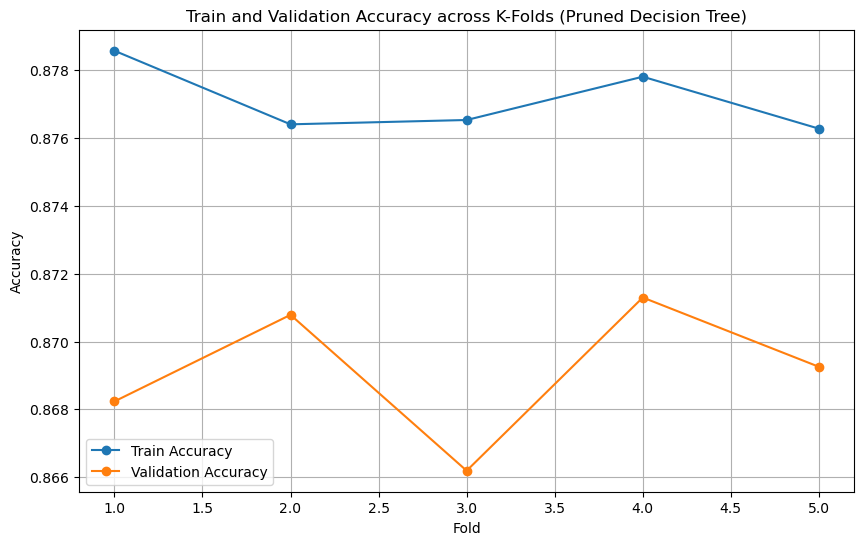

Average Train Accuracy: 0.8771
Average Validation Accuracy: 0.8692


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Prepare data for stratified k-fold cross-validation
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df['sentiment'].values
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assign folds
for f, (train_index, val_index) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_index, 'kfold'] = f

# Initialize lists to store train and validation scores
train_accuracy_list = []
val_accuracy_list = []

# Define parameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

for fold in range(5):
    train_df = df[df.kfold != fold].reset_index(drop=True)
    val_df = df[df.kfold == fold].reset_index(drop=True)

    # Vectorization
    tfidf_vec = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_vec.fit(train_df['User_Comment'])
    xtrain = tfidf_vec.transform(train_df['User_Comment'])
    xval = tfidf_vec.transform(val_df['User_Comment'])

    # Decision Tree Model with GridSearchCV for pruning
    base_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(xtrain, train_df['sentiment'])

    # Best pruned model
    best_model = grid_search.best_estimator_

    # Train predictions and accuracy
    train_preds = best_model.predict(xtrain)
    train_accuracy = accuracy_score(train_df['sentiment'], train_preds)
    train_accuracy_list.append(train_accuracy)

    # Validation predictions and accuracy
    val_preds = best_model.predict(xval)
    val_accuracy = accuracy_score(val_df['sentiment'], val_preds)
    val_accuracy_list.append(val_accuracy)

    print(f'Fold: {fold}')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Validation Accuracy: {val_accuracy}')
    print(f'Classification Report:\n{classification_report(val_df["sentiment"], val_preds)}')
    print('---')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), train_accuracy_list, marker='o', label='Train Accuracy')
plt.plot(range(1, 6), val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy across K-Folds (Pruned Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

# Print average scores
print(f"Average Train Accuracy: {np.mean(train_accuracy_list):.4f}")
print(f"Average Validation Accuracy: {np.mean(val_accuracy_list):.4f}")


In [25]:
# Vectorize the input comment using the trained TfidfVectorizer
input_comment = ['The bank service was terrible.']
vectorized_input = tfidf_vec.transform(input_comment)

# Make predictions using the best model
prediction = best_model.predict(vectorized_input)

print(f'Predicted Sentiment: {prediction}')


Predicted Sentiment: ['positive']


# The CountVectorizer Model

Fold: 0
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Accuracy: 0.8761491317671093
Validation Accuracy: 0.8718079673135853
Classification Report:
              precision    recall  f1-score   support

    negative       0.52      0.16      0.24       191
     neutral       0.64      0.10      0.17        73
    positive       0.88      0.99      0.93      1694

    accuracy                           0.87      1958
   macro avg       0.68      0.41      0.45      1958
weighted avg       0.84      0.87      0.84      1958

---
Fold: 1
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.8655515832482125
Validation Accuracy: 0.865679264555669
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.01      0.01       191
     neutral       0.00      0.00      0.00        73
    positive       0.87      1.00      0.93      1694

    accuracy           

/home/ebuka/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ebuka/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ebuka/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold: 2
Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.8889172625127681
Validation Accuracy: 0.8758937691521961
Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.23      0.33       191
     neutral       0.57      0.05      0.10        74
    positive       0.89      0.99      0.93      1693

    accuracy                           0.88      1958
   macro avg       0.69      0.42      0.45      1958
weighted avg       0.85      0.88      0.84      1958

---
Fold: 3
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Train Accuracy: 0.8767875383043923
Validation Accuracy: 0.8733401430030644
Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.18      0.28       191
     neutral       0.67      0.08      0.14        74
    positive       0.88      0.99      0.93      1693

    accuracy          

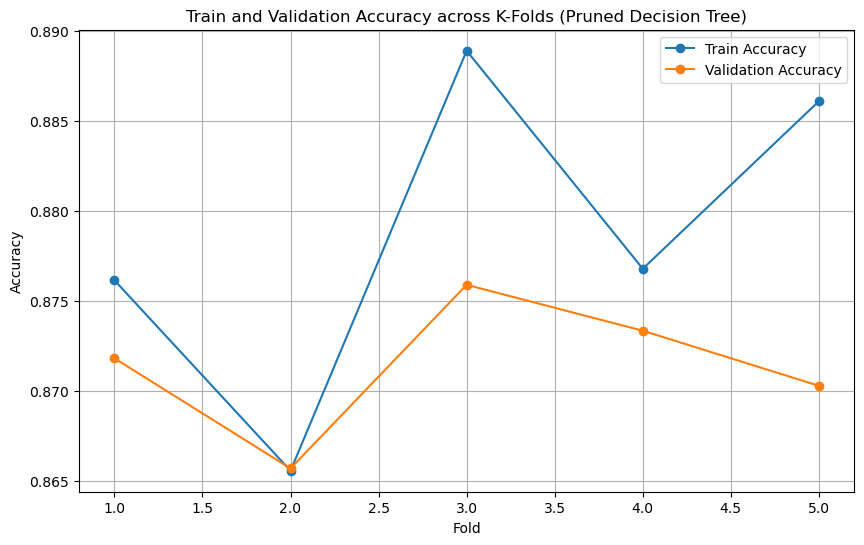

Average Train Accuracy: 0.8787
Average Validation Accuracy: 0.8714


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Prepare data for stratified k-fold cross-validation
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df['sentiment'].values
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assign folds
for f, (train_index, val_index) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_index, 'kfold'] = f

# Initialize lists to store train and validation scores
train_accuracy_list = []
val_accuracy_list = []

# Define parameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

for fold in range(5):
    train_df = df[df.kfold != fold].reset_index(drop=True)
    val_df = df[df.kfold == fold].reset_index(drop=True)

    # Vectorization using CountVectorizer
    count_vec = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
    count_vec.fit(train_df['User_Comment'])
    xtrain = count_vec.transform(train_df['User_Comment'])
    xval = count_vec.transform(val_df['User_Comment'])

    # Decision Tree Model with GridSearchCV for pruning
    base_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(xtrain, train_df['sentiment'])

    # Best pruned model
    best_model = grid_search.best_estimator_

    # Train predictions and accuracy
    train_preds = best_model.predict(xtrain)
    train_accuracy = accuracy_score(train_df['sentiment'], train_preds)
    train_accuracy_list.append(train_accuracy)

    # Validation predictions and accuracy
    val_preds = best_model.predict(xval)
    val_accuracy = accuracy_score(val_df['sentiment'], val_preds)
    val_accuracy_list.append(val_accuracy)

    print(f'Fold: {fold}')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Train Accuracy: {train_accuracy}')
    print(f'Validation Accuracy: {val_accuracy}')
    print(f'Classification Report:\n{classification_report(val_df["sentiment"], val_preds)}')
    print('---')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), train_accuracy_list, marker='o', label='Train Accuracy')
plt.plot(range(1, 6), val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy across K-Folds (Pruned Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

# Print average scores
print(f"Average Train Accuracy: {np.mean(train_accuracy_list):.4f}")
print(f"Average Validation Accuracy: {np.mean(val_accuracy_list):.4f}")


In [30]:
# Vectorize the input comment using the trained CountVectorizer
input_comment = ['The bank service was terrible.']
vectorized_input = count_vec.transform(input_comment)

# Make predictions using the best model
prediction = best_model.predict(vectorized_input)

print(f'Predicted Sentiment: {prediction}')


Predicted Sentiment: ['positive']


# The Vader Sentiment Analyzer Model

In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Function to classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the columns in the dataset
df['sentiment_scores'] = df['User_Comment'].apply(get_sentiment_scores)
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['predicted_sentiment'] = df['compound_score'].apply(classify_sentiment)

# Map 'Bank_Rating' to sentiment categories
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['actual_sentiment'] = df['Bank_Rating'].apply(map_rating_to_sentiment)



In [ ]:
# Split the data into training and testing sets
X = df['User_Comment']
y = df['actual_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# VADER is pre-trained, so we don't need to train it further

# Make predictions on the test set
y_pred = X_test.apply(lambda x: classify_sentiment(sia.polarity_scores(x)['compound']))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

    Negative       0.09      0.22      0.13        83
     Neutral       0.23      0.05      0.09       330
    Positive       0.81      0.88      0.84      1545

    accuracy                           0.71      1958
   macro avg       0.38      0.38      0.35      1958
weighted avg       0.68      0.71      0.69      1958



In [ ]:

# The function to predict sentiment for new text
def predict_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    return classify_sentiment(score)

# testing the model to make predictions on new user comments
new_comments = [
    "The bank service was excellent and very helpful.",
    "I had a terrible experience with this bank.",
    "The interest rates are competitive but the customer service needs improvement."
]

print("\nPredictions for new comments:")
for comment in new_comments:
    sentiment = predict_sentiment(comment)
    print(f"Comment: '{comment}'\nPredicted sentiment: {sentiment}\n")



Predictions for new comments:
Comment: 'The bank service was excellent and very helpful.'
Predicted sentiment: Positive

Comment: 'I had a terrible experience with this bank.'
Predicted sentiment: Negative

Comment: 'The interest rates are competitive but the customer service needs improvement.'
Predicted sentiment: Positive



# The Deep Learning Model: RNN(Recurrent Neural Network)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode sentiments
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['User_Comment'], df['sentiment'], test_size=0.2, random_state=42)

# Create vocabulary
vocab = set(' '.join(X_train).split())
word_to_ix = {word: i+1 for i, word in enumerate(vocab)}
word_to_ix['<PAD>'] = 0

# Convert text to indices
def text_to_indices(text, max_length=100):
    words = text.split()
    indices = [word_to_ix.get(word, 0) for word in words[:max_length]]
    indices += [0] * (max_length - len(indices))
    return indices

# Custom Dataset
class SentimentDataset(Dataset):
    def __init__(self, comments, sentiments):
        self.comments = comments
        self.sentiments = sentiments
    
    def __len__(self):
        return len(self.comments)
    
    def __getitem__(self, idx):
        comment = torch.tensor(text_to_indices(self.comments.iloc[idx]))
        sentiment = torch.tensor(self.sentiments.iloc[idx], dtype=torch.long)
        return comment, sentiment

# Create DataLoaders
train_dataset = SentimentDataset(X_train, y_train)
test_dataset = SentimentDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [11]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, text):
        embedded = self.embedding(text)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

# Hyperparameters
VOCAB_SIZE = len(word_to_ix)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(le.classes_)

# Initialize the model
model = RNN(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)


In [12]:
def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for batch in iterator:
        optimizer.zero_grad()
        text, labels = batch
        predictions = model(text)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

# Training loop
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

N_EPOCHS = 10
for epoch in range(N_EPOCHS):
    train_loss = train(model, train_loader, optimizer, criterion)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}')


Epoch: 01, Train Loss: 0.493
Epoch: 02, Train Loss: 0.481
Epoch: 03, Train Loss: 0.478
Epoch: 04, Train Loss: 0.478
Epoch: 05, Train Loss: 0.486
Epoch: 06, Train Loss: 0.486
Epoch: 07, Train Loss: 0.486
Epoch: 08, Train Loss: 0.484
Epoch: 09, Train Loss: 0.480
Epoch: 10, Train Loss: 0.484


In [14]:
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in iterator:
            text, labels = batch
            predictions = model(text)
            loss = criterion(predictions, labels)
            epoch_loss += loss.item()
            _, predicted = torch.max(predictions, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return epoch_loss / len(iterator), accuracy

# Evaluate the model
test_loss, test_accuracy = evaluate(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.3f}')

def map_sentiment(predicted_int):
    if predicted_int == 0:
        return 'negative'
    elif predicted_int == 1:
        return 'neutral'
    elif predicted_int == 2:
        return 'positive'
    else:
        return 'unknown'

# Modify the predict_sentiment function
def predict_sentiment(model, text):
    model.eval()
    indices = torch.tensor(text_to_indices(text)).unsqueeze(0)
    with torch.no_grad():
        prediction = model(indices)
        _, predicted = torch.max(prediction, 1)
    predicted_int = predicted.item()
    return map_sentiment(predicted_int)


# Example prediction
sample_comment =  "I am disappointed with the hidden fees and poor communication from this bank staff"
predicted_sentiment = predict_sentiment(model, sample_comment)
print(f"Comment: {sample_comment}")
print(f"Predicted Sentiment: {predicted_sentiment}")


Test Loss: 0.472, Test Accuracy: 0.868
Comment: I am disappointed with the hidden fees and poor communication from this bank staff
Predicted Sentiment: positive
